## **Business Problem**

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients’ advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## **Data Description**

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.


---


Key features included in the dataset are as follows:

*   Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
*  Ad Views: The number of times the ad was viewed.
*   Ad Clicks: The number of clicks received on the ad.
*   Ad Conversions: The number of conversions resulting from the ad.
*   Cost per Ad: The cost associated with running the Facebook ad campaign.
*   Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
*   Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
*  Cost per Click (CPC): The average cost incurred per click on the ad.

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
# Preview and initial info
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
#  Clean and convert financial and rate columns to numeric

def clean_currency(x):
    # Remove $ sign, commas, spaces, then convert to float
    if pd.isnull(x):
        return np.nan
    return float(str(x).replace('$', '').replace(',', '').strip())

def clean_percentage(x):
    # Remove % sign and convert to float fraction (e.g. '12.5%' -> 0.125)
    if pd.isnull(x):
        return np.nan
    return float(str(x).replace('%', '').strip()) / 100

# Apply cleaning functions to Facebook columns
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(clean_currency)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(clean_percentage)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(clean_percentage)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(clean_currency)

# Apply cleaning functions to AdWords columns
df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].apply(clean_currency)
df['AdWords Click-Through Rate (Clicks / View)'] = df['AdWords Click-Through Rate (Clicks / View)'].apply(clean_percentage)
df['AdWords Conversion Rate (Conversions / Click)'] = df['AdWords Conversion Rate (Conversions / Click)'].apply(clean_percentage)
df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].apply(clean_currency)

print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                      float64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                       float64
AdWords Click-Through Rate (Clicks / View)      

In [6]:
#  Rename columns to shorter names for easier coding (adjust as needed):

df.rename(columns={
    'Date': 'date',
    'Facebook Ad Campaign': 'facebook_ad_campaign',
    'Facebook Ad Views': 'facebook_ad_views',
    'Facebook Ad Clicks': 'facebook_ad_clicks',
    'Facebook Ad Conversions': 'facebook_ad_conversions',
    'Cost per Facebook Ad': 'facebook_cost_per_ad',
    'Facebook Click-Through Rate (Clicks / View)': 'facebook_ctr',
    'Facebook Conversion Rate (Conversions / Clicks)': 'facebook_conversion_rate',
    'Facebook Cost per Click (Ad Cost / Clicks)': 'facebook_cost_per_click',
    'AdWords Ad Campaign': 'adword_ad_campaign',
    'AdWords Ad Views': 'adword_ad_views',
    'AdWords Ad Clicks': 'adword_ad_clicks',
    'AdWords Ad Conversions': 'adword_ad_conversions',
    'Cost per AdWords Ad': 'adword_cost_per_ad',
    'AdWords Click-Through Rate (Clicks / View)': 'adword_ctr',
    'AdWords Conversion Rate (Conversions / Click)': 'adword_conversion_rate',
    'AdWords Cost per Click (Ad Cost / Clicks)': 'adword_cost_per_click'
}, inplace=True)

In [7]:
# Descriptive statistics and overview
df.describe()

,date,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,0.022013,0.271533,2.187808,4717.19726,60.383562,5.980822,134.975342,0.012958,0.101844,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.008300,0.214800,0.610000,3714.00000,31.000000,3.000000,73.000000,0.005700,0.061300,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,0.014900,0.238000,1.410000,4247.00000,49.000000,5.000000,110.000000,0.010300,0.077000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,0.020000,0.267700,2.020000,4711.00000,60.000000,6.000000,135.000000,0.012900,0.099300,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,0.026700,0.289700,2.760000,5190.00000,73.000000,7.000000,162.000000,0.015200,0.120300,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,0.053700,0.475900,7.140000,5760.00000,89.000000,9.000000,197.000000,0.022500,0.200600,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.009332,0.041659,1.040820,561.11406,14.368225,1.628106,32.338304,0.003388,0.028874,0.856929


## Comparing Campaigns performance

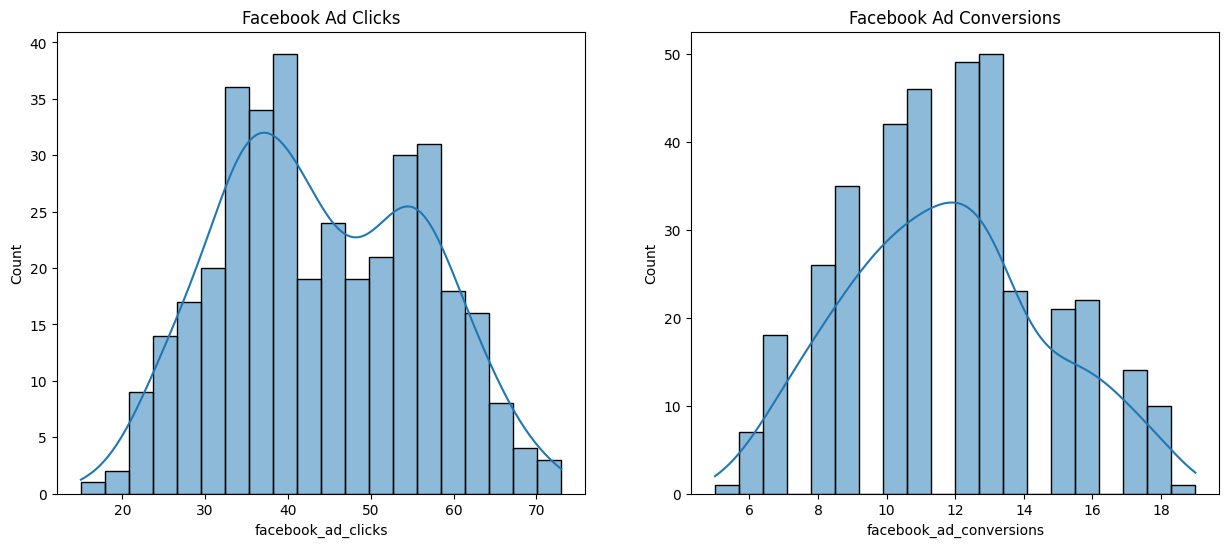

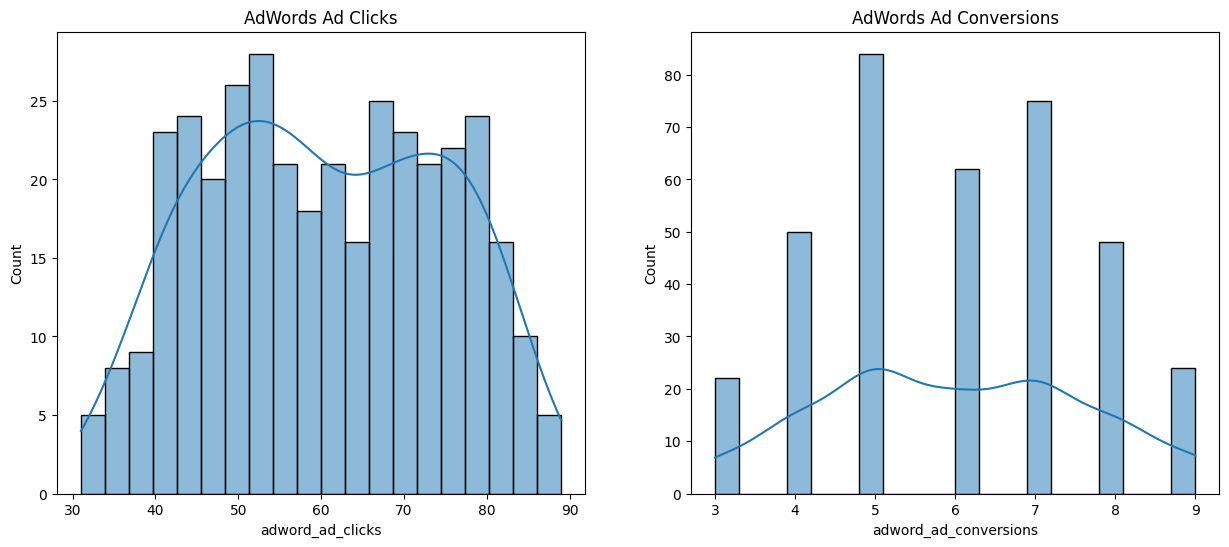

In [8]:
# Distribution plots for Clicks and Conversions

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'], bins=20, kde=True)
plt.subplot(1, 2, 2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['facebook_ad_conversions'], bins=20, kde=True)
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['adword_ad_clicks'], bins=20, kde=True)
plt.subplot(1, 2, 2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['adword_ad_conversions'], bins=20, kde=True)
plt.show()


In [9]:
# Create conversion category function and apply

def create_conversion_category(series):
    """Categorize conversions into buckets."""
    category = []
    for conv in series:
        if conv < 6:
            category.append('less than 6')
        elif 6 <= conv < 11:
            category.append('6 - 10')
        elif 11 <= conv < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

df['facebook_conversion_category'] = create_conversion_category(df['facebook_ad_conversions'])
df['adword_conversion_category'] = create_conversion_category(df['adword_ad_conversions'])

In [10]:
# Count days per conversion category and merge

fb_count = df['facebook_conversion_category'].value_counts().reset_index()
fb_count.columns = ['Category', 'Facebook']

adw_count = df['adword_conversion_category'].value_counts().reset_index()
adw_count.columns = ['Category', 'AdWords']

category_df = pd.merge(fb_count, adw_count, on='Category', how='outer').fillna(0)
# Order categories for plotting
categories_order = ['less than 6', '6 - 10', '10 - 15', 'more than 15']
category_df['Category'] = pd.Categorical(category_df['Category'], categories=categories_order, ordered=True)
category_df = category_df.sort_values('Category').reset_index(drop=True)

print("\nConversion categories count:\n", category_df)


Conversion categories count:
        Category  Facebook  AdWords
0   less than 6         1    156.0
1        6 - 10       128    209.0
2       10 - 15       189      0.0
3  more than 15        47      0.0


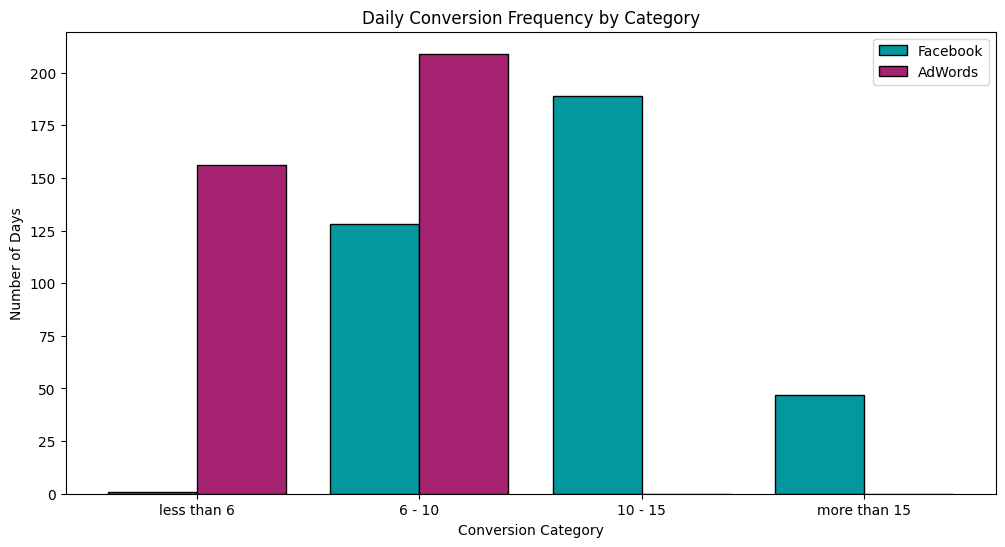

In [11]:
# Bar plot comparison

x_axis = np.arange(len(category_df))

plt.figure(figsize=(12,6))
plt.bar(x_axis - 0.2, category_df['Facebook'], 0.4, label='Facebook', color='#03989E', edgecolor='k')
plt.bar(x_axis + 0.2, category_df['AdWords'], 0.4, label='AdWords', color='#A62372', edgecolor='k')
plt.xticks(x_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Daily Conversion Frequency by Category')
plt.legend()
plt.show()

Here is the extracted content from the most recent image you provided:
*   The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6–10).
*   There is a significant variance in the number of high-conversion days between two different campaigns.
*   The absence of any days with conversions between 10–15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.




**Do more clicks on the ad really lead to more sales?**

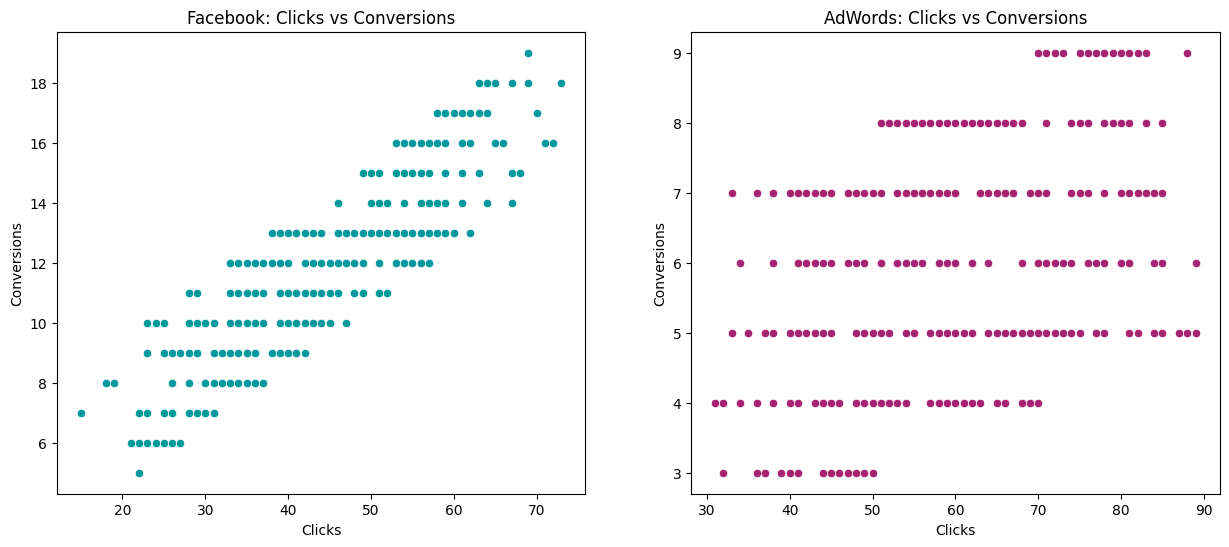

In [12]:
# Scatter plot Clicks vs Conversions for both campaigns

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Facebook: Clicks vs Conversions')
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title('AdWords: Clicks vs Conversions')
sns.scatterplot(x=df['adword_ad_clicks'], y=df['adword_ad_conversions'], color='#A62372')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()

In [13]:
#  Correlation coefficients

fb_corr = df[['facebook_ad_clicks', 'facebook_ad_conversions']].corr().iloc[0,1]
adw_corr = df[['adword_ad_clicks', 'adword_ad_conversions']].corr().iloc[0,1]
print(f"\nCorrelation Coefficient:")
print(f"Facebook: {fb_corr:.2f}")
print(f"AdWords: {adw_corr:.2f}")


Correlation Coefficient:
Facebook: 0.87
AdWords: 0.45


Here is the extracted text from the image you provided:

* A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.

* This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.

* The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

* A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.

* The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.





# **Hypothesis Testing**

**Hypothesis**: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0)**: There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: μ_Facebook ≤ μ_AdWords

**Alternate Hypothesis (H1)**: The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: μ_Facebook > μ_AdWords

In [14]:
#  T-test: Check if Facebook conversions are significantly higher than AdWords

print('\nMean Conversions:')
print('='*50)
print(f"Facebook: {df['facebook_ad_conversions'].mean():.2f}")
print(f"AdWords: {df['adword_ad_conversions'].mean():.2f}")
print('='*50)

t_stat, p_val = st.ttest_ind(
    df['facebook_ad_conversions'],
    df['adword_ad_conversions'],
    equal_var=False
)

print(f"\nt-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2e}")
print('='*50)
if p_val < 0.05:
    print("Result: Reject null hypothesis, Facebook conversions are significantly higher.")
else:
    print("Result: Fail to reject null hypothesis, no significant difference.")


Mean Conversions:
Facebook: 11.74
AdWords: 5.98

t-statistic: 32.88
p-value: 9.35e-134
Result: Reject null hypothesis, Facebook conversions are significantly higher.


- The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

- The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

- The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

- Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

# **Regression Analysis**

What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?


Regression Results for Facebook:
R2 Score: 76.35%
Mean Squared Error: 2.02
Intercept: 2.47
Coefficient (Slope): 0.21


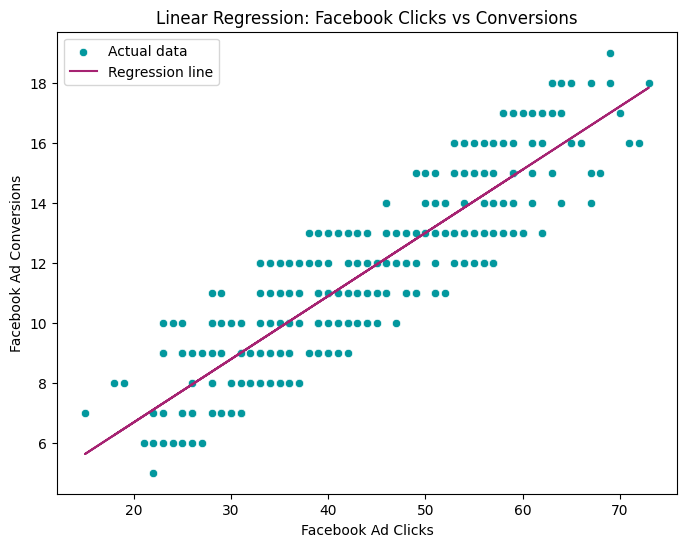

In [15]:
#  Linear regression predicting Facebook conversions from Facebook clicks

X = df[['facebook_ad_clicks']]
y = df[['facebook_ad_conversions']]

reg_model = LinearRegression()
reg_model.fit(X, y)
predictions = reg_model.predict(X)

r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)

print(f"\nRegression Results for Facebook:\nR2 Score: {r2:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Intercept: {reg_model.intercept_[0]:.2f}")
print(f"Coefficient (Slope): {reg_model.coef_[0][0]:.2f}")

# Plot regression line with data

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color='#03989E', label='Actual data')
plt.plot(df['facebook_ad_clicks'], predictions, color='#A62372', label='Regression line')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.title('Linear Regression: Facebook Clicks vs Conversions')
plt.legend()
plt.show()


In [16]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


- The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

- With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

# Analyzing Facebook Campaign metrics over time

In [17]:
print("Facebook Avg Cost per Conversion:",
      (df['facebook_cost_per_ad'].sum() / df['facebook_ad_conversions'].sum()))
print("AdWords Avg Cost per Conversion:",
      (df['adword_cost_per_ad'].sum() / df['adword_ad_conversions'].sum()))


Facebook Avg Cost per Conversion: 7.475501633224452
AdWords Avg Cost per Conversion: 22.568025652771414


In [18]:
def clean_percentage(x):
    """
    Strips '%' if present and converts to float percentage.
    Allows for float or NaN input to pass through unchanged.
    """
    if pd.isnull(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x.endswith('%'):
            x = x[:-1]
        return float(x)
    # Already a float/int or something else: just return as float
    return float(x)

def clean_currency(x):
    """
    Strips '$' if present and converts to float.
    Allows for float or NaN input to pass through unchanged.
    """
    if pd.isnull(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('$'):
            x = x[1:]
        return float(x.replace(",", ""))
    return float(x)



In [19]:
df['facebook_ctr'] = df['facebook_ctr'].apply(clean_percentage)
df['facebook_conversion_rate'] = df['facebook_conversion_rate'].apply(clean_percentage)
df['facebook_cost_per_click'] = df['facebook_cost_per_click'].apply(clean_currency)
df['facebook_cost_per_ad'] = df['facebook_cost_per_ad'].apply(clean_currency)


In [20]:
# Filtering for Facebook campaign
df = df[['date','facebook_ad_views',
         'facebook_ad_clicks','facebook_ad_conversions','facebook_cost_per_ad',
         'facebook_ctr','facebook_conversion_rate','facebook_cost_per_click']]


**At what times of Month or days of the weeks do we observe the conversions**

In [21]:
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.weekday

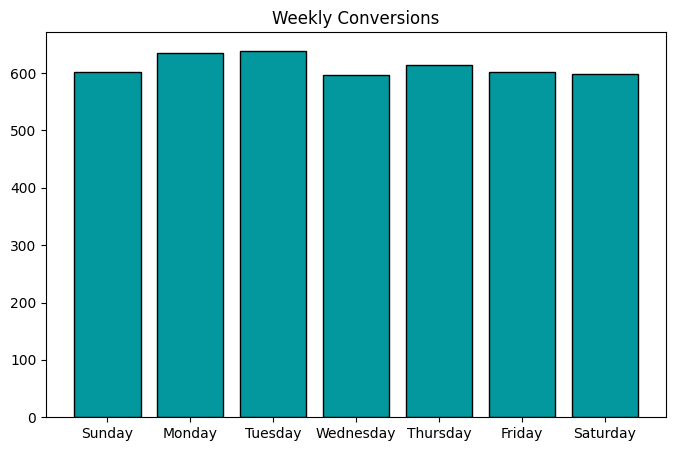

In [22]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')['facebook_ad_conversions'].sum()
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion, color='#03989E', edgecolor='k')
plt.show()

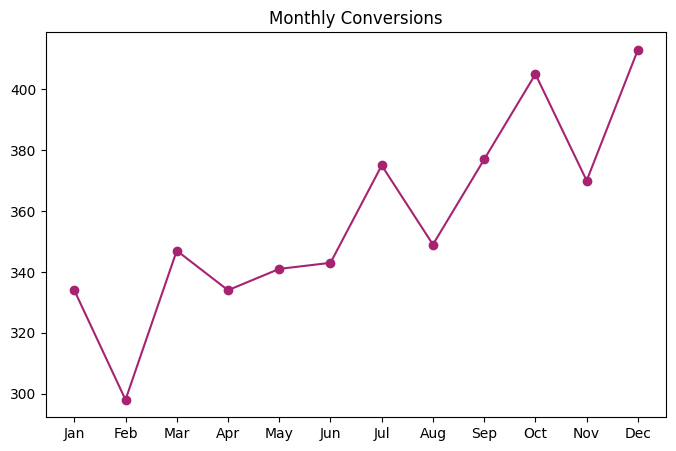

In [23]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['facebook_ad_conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['facebook_ad_conversions'], '-o', color='#A62372')
plt.show()

- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, **Mondays and Tuesdays** consistently exhibit the **highest conversion rates** compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

- Examining the monthly trend of conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. **February, April, May, June, August, and November experience a decline in conversions** compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.



**How does the Cost Per Conversion (CPC) trend over time?**

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

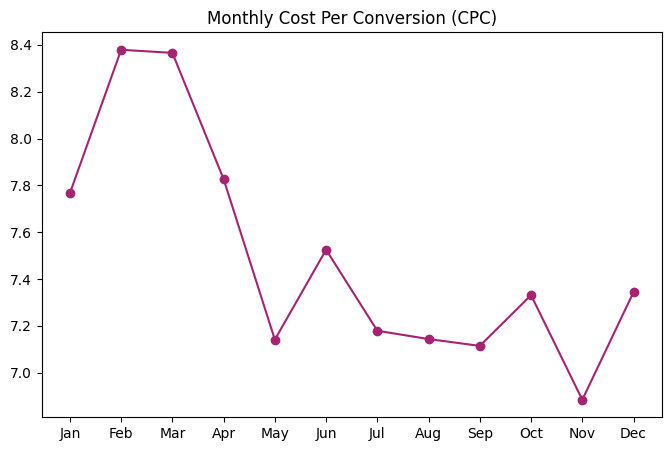

In [24]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')

monthly_df = df.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color='#A62372')
plt.show()

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.

- May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.

- February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.

- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.

- **Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.**





**Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?**

In [25]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(df['facebook_cost_per_ad'], df['facebook_ad_conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. **This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.**

- Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.